In [36]:
import pandas as pd
from typing import Dict
from visualization.utils import WARSAW_CENTER, calculate_distance
from tqdm import tqdm

In [37]:
RADIUS = 1

def in_center(lat: float, lon: float) -> bool:
    return calculate_distance((lat, lon), (WARSAW_CENTER[0], WARSAW_CENTER[1])) < RADIUS

In [38]:
def get_vehicles_in_center(df: pd.DataFrame) -> pd.DataFrame:
    all_positions = df[df.apply(lambda x: in_center(x['Lat'], x['Lon']), axis=1)]
    return all_positions['VehicleNumber'].unique()

In [39]:
def filter_idle_vehicles(df: pd.DataFrame) -> pd.DataFrame:
    for vehicle in df['VehicleNumber'].unique():
        vehicle_positions = df[df['VehicleNumber'] == vehicle]
        if calculate_distance((vehicle_positions['Lat'].max(), vehicle_positions['Lon'].max()), (vehicle_positions['Lat'].min(), vehicle_positions['Lon'].min())) < 0.1:
            df = df[df['VehicleNumber'] != vehicle]
    return df

In [41]:
hours = [i for i in range(2, 6)] + [i for i in range(15, 19)]

In [42]:
buses_location: Dict[int, pd.DataFrame] = {}
buses_in_center: Dict[int, int] = {}

for hour in tqdm(hours):
    buses_location[hour] = pd.read_json(f'../data/buses-{hour}.json')
    buses_location[hour] = filter_idle_vehicles(buses_location[hour])
    buses_in_center[hour] = len(get_vehicles_in_center(buses_location[hour]))


 12%|█▎        | 1/8 [00:33<03:52, 33.18s/it]

not idle buses for 2: 196
buses in center for 2: 65


 25%|██▌       | 2/8 [01:10<03:34, 35.82s/it]

not idle buses for 3: 351
buses in center for 3: 64


 38%|███▊      | 3/8 [01:58<03:25, 41.01s/it]

not idle buses for 4: 950
buses in center for 4: 92


 50%|█████     | 4/8 [02:47<02:57, 44.39s/it]

not idle buses for 5: 1324
buses in center for 5: 164


 62%|██████▎   | 5/8 [03:35<02:16, 45.49s/it]

not idle buses for 15: 1525
buses in center for 15: 268


 75%|███████▌  | 6/8 [04:21<01:31, 45.97s/it]

not idle buses for 16: 1527
buses in center for 16: 257


 88%|████████▊ | 7/8 [05:11<00:47, 47.07s/it]

not idle buses for 17: 1522
buses in center for 17: 250


100%|██████████| 8/8 [06:02<00:00, 45.31s/it]

not idle buses for 18: 1526
buses in center for 18: 260


In [43]:
buses_in_center = {k: v / len(buses_location[k]['VehicleNumber'].unique()) for k, v in buses_in_center.items()}

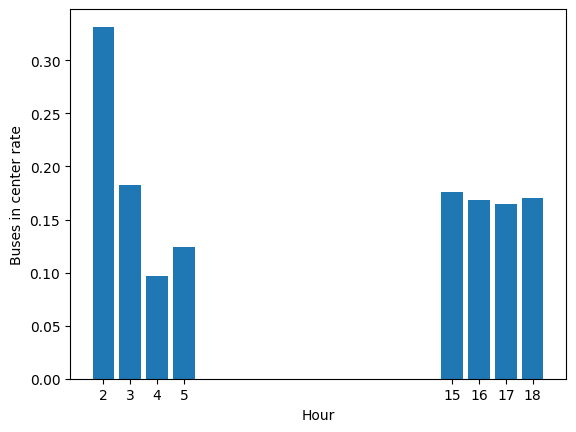

In [50]:
# for each hour, plot the frequency of buses in the center
import matplotlib.pyplot as plt

plt.bar(buses_in_center.keys(), buses_in_center.values())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Buses in center rate')
plt.show()